### 数据的归一化处理


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from matplotlib import rcParams  ## run command settings for plotting
from sklearn.model_selection import train_test_split 
#导入必要的库
#设置画图参数
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   # 字号
    'axes.unicode_minus': False # 处理负号
}
rcParams.update(config)

In [2]:
## 读取数据
path = 'D:/CPP in vscode/机器学习/线性回归/regress_data1.csv'
data = pd.read_csv(path) ## data 是dataframe 的数据类型
data.head() # 返回data中的前几行数据，默认是前5行。  

,人口,收益
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


划分数据集后对数据采取Z-score标准化法
$$\frac{x-\mu }{\sigma}$$
将未标准化后的数据标识为蓝色，标准化后的数据标识为青色

In [3]:
col=data.shape[1]
X_data=data.iloc[:,:col-1]
y_data=data.iloc[:,col-1:]
X_data.insert(0,"ones",1)#在第一列插入全1行
X=X_data.values
Y=y_data.values


In [4]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=40)

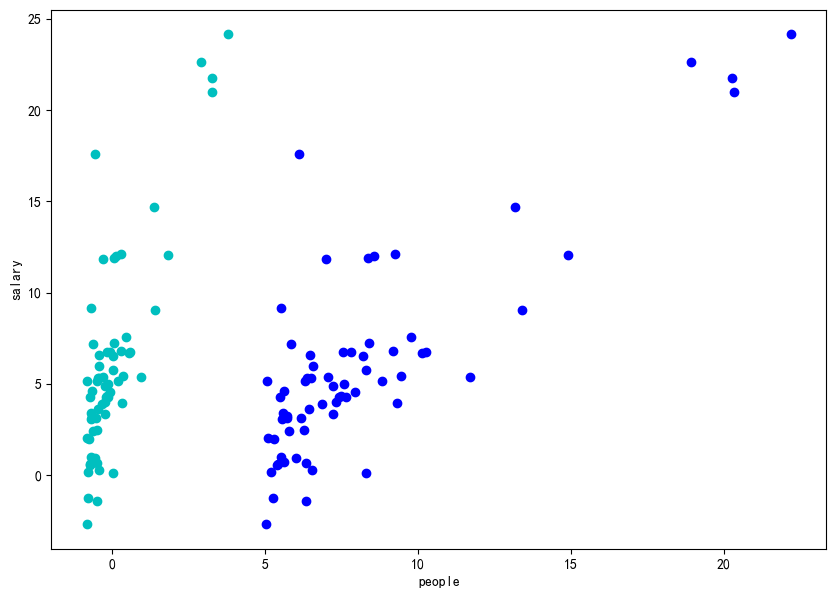

In [5]:
x_mean=x_train[:,1:].mean()
x_std=x_train[:,1:].std()
plt.figure(figsize=(10,7))
plt.xlabel("people")
plt.ylabel("salary")
plt.scatter(x_train[:,1:],y_train,c='b')
x_train[:,1:]=(x_train[:,1:]-x_mean) / x_std

plt.scatter(x_train[:,1:],y_train,c='c')
plt.show()

观察图像可以得知数据的取值范围变得更加密集，同时数据的分布并没有发生太大的改变

### 损失函数：  
已知均方误差
$\begin{aligned}MSE &= \frac{1}{m}\sum_{i=1}^{m}(y_i - \hat{y}_i)^2\\\end{aligned}$是线性回归模型的损失函数   
假设真实标签y与线性回归模型的$f(x,\omega)$预测输出之间存在误差为$\varepsilon$,即
$$y=f(x,\omega) + \varepsilon $$
假设$\varepsilon$服从均值为0，$\frac{1}{\beta}$为方差的正态分布
$$p(\varepsilon|\beta)=N(\varepsilon|0,\beta^{-1}) , \beta \in \frac{1}{\sigma^{2}}$$
这就意味着$p( y | x,\omega,\beta)=N(y | f(x,\omega),\beta^{-1})$.给定特征X={x1,x2,.....,xn}和标签观察到的数据$y=\left \{ y1,y2,.....,yn\right \}^{T}$,根据它们的分布，他们的似然函数可以写为:$p(y|X,\omega,\beta)=\prod_{n=1}^{N}N(y_{n}|\omega^{T}x_{n},\beta^{-1})$,其中$\omega^{T}x_{n}$是我们的线性回归模型    

化为对数似然函数为：$$lnp=(y|X,\omega,\beta)=lnN(y_{n}|\omega^{T}x_{n},\beta^{-1})=\frac{N}{2}ln\beta-\frac{N}{2}ln(2\pi)-\beta \frac{1}{2}\sum_{n=1}^{N}(y_{n}-\omega^{T}x_{n})^{2}$$
损失函数为$E_{D}(\omega)=\frac{1}{2}(y_{n}-\omega^{T}x_{n})^{2}$。我们需要让损失函数最小，似然函数最大，故由此可得似然函数和损失函数是等价的


### 正则项：
假$\omega$~$N(0,\frac{1}{\beta})$的正态分布.$p(y,\omega)=p(y|\omega)p(\omega)$   
带入似然函数
$$
\begin{aligned}
\ln L&=\ln \prod_{i=1}^{m}p(y_i|w)p(w)\\
&= -MSE - \frac{\beta}{2} w^2 +C
\end{aligned}
$$
最大化$\ln L$，就是最小化$MSE + \frac{ \beta }{2} w^2$。$\frac{\beta}{2} w^2$被称为正则项。它可以防止过拟合。我们可以将正则项加入到损失函数中，得到正则化的损失函数：
$$
\ell = MSE + \frac{\beta}{2} w^2
=MSE+\frac{\beta}{2}\Vert w \Vert_2$$
L2正则化后的损失函数如下：$$L(\omega)=MSE+\lambda\Sigma _{j=1}^{D}\omega_{j}^{2}$$
其中：N是样本数量，D是特征的维度，$λ^{'}$是正则化系数，控制正则化项的影响力度  
   



### L2正则化的梯度：  
为了最小化损失函数L(w)，我们需要计算损失函数对每个$\omega_{j}$权重的偏导数，即梯度。对于均方误差部分，其对$\omega_{j}$的偏导为：
$$\frac{\partial }{\partial \omega_{j}}(\frac{1}{2N}\Sigma _{i=1}^{N}(y_{i}-w^{T}x_{i})^{2})=-\frac{1}{N}\Sigma _{i=1}^{N}(y_{i}-w^{T}x_{i})x_{ij}$$
对于L2正则化项，其对$w_{j}$的偏导为：（此处用$\omega$暂代$\Sigma _{j=1}^{D}\omega_{j}$，$\omega$是一个nX1的向量）
$$\frac{\partial(\omega^{T}\omega)}{\partial\omega}=\frac{\omega^{2}_{1}+\omega^{2}_{2}+...+\omega^{2}_{n}}{\partial\omega}=
\begin{bmatrix}2\omega_{1}
\\ 2\omega_{2}
\\ \cdot \cdot \cdot 
\\ 2\omega_{n}
\end{bmatrix}=2\omega$$
可以得知
$$\frac{\partial }{\partial w_{j}}(\lambda\Sigma _{j=1}^{D}\omega_{j}^{2})=2\lambda w_{j}
$$
将这两部分合并，可得到对$w_{j}$的总梯度
$$\frac{\partial L(w)}{\partial w_{j}}=-\frac{1}{N}\Sigma _{i=1}^{N}(y_{i}-\omega^{T}x_{i})x_{ij}+2\lambda w_{j}$$


### 权重的更新公式
在梯度下降中，我们使用计算出的梯度来更新每个权重，更新公式为：
$$w_{j}:=w_{j}-\alpha(\frac{\partial L(w)}{\partial w_{j}})$$

In [6]:

W=np.array([[0.0],[0.0]]) ## 初始化W系数矩阵，w 是一个(2,1)矩阵
(x_train.shape,y_train.shape,W.shape) #查看一下维度

((67, 2), (67, 1), (2, 1))

In [7]:
def computeCost(X,Y,W,lambda_reg):
    num_train = X.shape[0]
    Y_hat = X@W
    loss = np.sum((Y_hat - Y) ** 2) / (2 * num_train)
    reg_loss = lambda_reg * np.sum(W[1:] ** 2)# 不对偏置项进行正则化
    return loss + reg_loss
def gradientDescent(X,Y,W,alpha,lambda_reg):
    num_train = X.shape[0]
    Y_hat = X @ W
    dw = X.T @ (Y_hat - Y) / num_train
    reg_dw = lambda_reg * W 
    reg_dw[0] = 0 # 不对偏置项w0进行正则化
    W += -alpha * (dw + reg_dw)
    return W

def linearRegression(X,Y,alpha,iters,lambda_reg):
    loss_his=[] #第一步：初始化模型参数
    feature_dim=X.shape[1]
    W=np.zeros((feature_dim,1))#初始化W系数矩阵
    for i in range(iters):
        W=gradientDescent(X,Y,W,alpha,lambda_reg)
        w_=W.copy()
        loss_his.append(w_)
    return loss_his    #返回迭代过程中的损失
def predict(X,W):
    """
    输入：
        X:测试数据集
        W:模型训练好的参数
    输出:
        y_pre:预测值
    """
    y_pre=np.dot(X,W)
    return y_pre



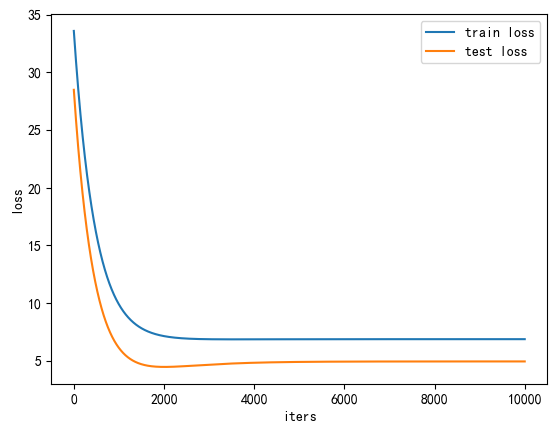

In [8]:
alpha =0.001
iters = 10000
lambda_reg =0.1# 可以调整这个值来观察正则化的效果
loss_his1 = linearRegression(x_train,y_train, alpha, iters,lambda_reg)
loss_train=[]
loss_test=[]

#标准化测试数据
x_test[:,1:]=(x_test[:,1:]-x_mean)/x_std

for l in loss_his1:
    loss_train.append(computeCost(x_train,y_train,l,lambda_reg))
    loss_test.append(computeCost(x_test,y_test,l,lambda_reg))
iter = np.arange(iters)
plt.plot(iter, loss_train, label='train loss')
plt.plot(iter, loss_test, label='test loss')
plt.legend()
plt.xlabel('iters')
plt.ylabel('loss')
plt.show()

最小二乘法求解W

In [9]:
W_lsq = np.linalg.inv(x_train.T@x_train)@x_train.T@y_train

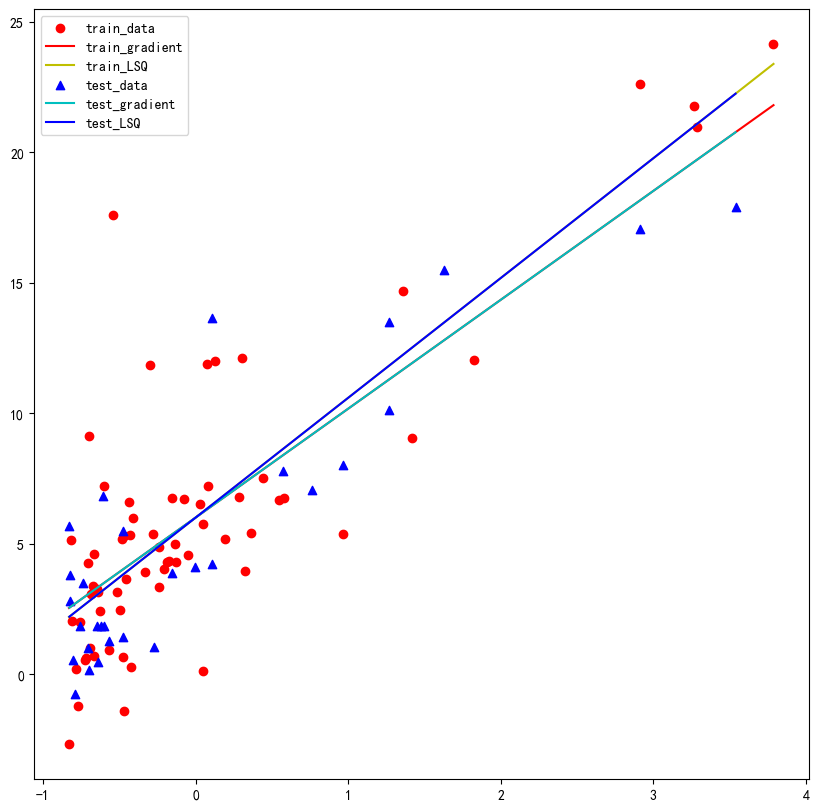

In [10]:

x_test_0=np.linspace(x_test.min(),x_test.max(),100)
y_test_0 = loss_his1[len(loss_his1)-1][0] + loss_his1[len(loss_his1)-1][1] * x_test_0
y_lsq_test=W_lsq[0]+W_lsq[1]*x_test_0
x_train_0 = np.linspace(x_train.min(), x_train.max(), 100)
y_train_0 = loss_his1[len(loss_his1)-1][0] + loss_his1[len(loss_his1)-1][1] * x_train_0
y_lsq_train=W_lsq[0]+W_lsq[1]*x_train_0

plt.figure(figsize=(10,10))
plt.scatter(x_train[:,1:],y_train,label='train_data',c='r')
#plt.plot(x_train[:,1:],y_train,'ro')
plt.plot(x_train_0,y_train_0,label='train_gradient',c='r')
plt.plot(x_train_0,y_lsq_train,label='train_LSQ',c='y')
#plt.plot(x_test[:, 1:2], y_test, 'b^')
plt.scatter(x_test[:, 1:2], y_test, c='b',label='test_data',marker='^')
plt.plot(x_test_0,y_test_0,label='test_gradient',c='c')
plt.plot(x_test_0,y_lsq_test,label='test_LSQ',c='b')
plt.legend()
plt.show()


